Enter the number of processes: 5

Process 1:
Enter arrival time: 7
Enter burst time: 4

Process 2:
Enter arrival time: 4
Enter burst time: 5

Process 3:
Enter arrival time: 2
Enter burst time: 6

Process 4:
Enter arrival time: 0
Enter burst time: 8

Process 5:
Enter arrival time: 6
Enter burst time: 4

 Process Table:
+------------+--------------+------------+-----------------+-----------------+--------------+---------------+
| Process ID | Arrival Time | Burst Time | Completion Time | Turnaround Time | Waiting Time | Response Time |
+------------+--------------+------------+-----------------+-----------------+--------------+---------------+
|     P4     |      0       |     8      |        8        |        8        |      0       |       0       |
|     P3     |      2       |     6      |       14        |       12        |      6       |       6       |
|     P2     |      4       |     5      |       19        |       15        |      10      |      10       |
|     P5     |      

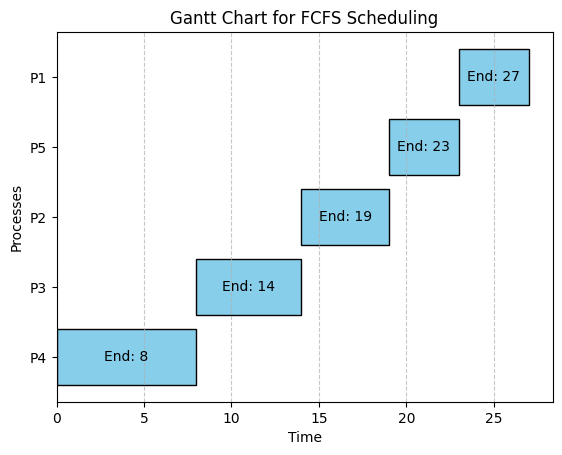

In [ ]:
from operator import itemgetter
from tabulate import tabulate
import matplotlib.pyplot as plt

class Scheduler:
    def __init__(self):
        # List to store all processes
        self.processes = []

    def add_process(self, arrival_time, burst_time, process_id):
        # Add a new process to the list
        self.processes.append({"process_id": process_id, "arrival_time": arrival_time, "burst_time": burst_time})

    def fcfs_scheduling(self):
        # Sort processes by arrival time (FCFS)
        self.processes.sort(key=itemgetter("arrival_time"))
        current_time = 0  # Current time in the system

        for process in self.processes:
            # If the process arrives after the current time, wait until its arrival
            if current_time < process['arrival_time']:
                current_time = process['arrival_time']

            # Calculate start time, completion time, waiting time, turnaround time, and response time
            process['start_time'] = current_time
            process['completion_time'] = current_time + process['burst_time']
            process['waiting_time'] = process['start_time'] - process['arrival_time']
            process['turnaround_time'] = process['completion_time'] - process['arrival_time']
            process['response_time'] = process['waiting_time']

            # Update current time to the completion time of the current process
            current_time = process['completion_time']

    def calculate_averages(self):
        # Calculate averages for waiting time, turnaround time, and response time
        n = len(self.processes)
        avg_waiting = sum(p['waiting_time'] for p in self.processes) / n
        avg_turnaround = sum(p['turnaround_time'] for p in self.processes) / n
        avg_response = sum(p['response_time'] for p in self.processes) / n

        # Display averages in a table
        data = [
            ["Average Waiting Time", f"{avg_waiting:.2f}"],
            ["Average Turnaround Time", f"{avg_turnaround:.2f}"],
            ["Average Response Time", f"{avg_response:.2f}"]
        ]
        print("\n Process Averages:")
        print(tabulate(data, headers=["Metric", "Value"], tablefmt="grid"))

        return avg_waiting, avg_turnaround, avg_response

    def display_table(self):
        # Display a table with details of each process
        headers = ['Process ID', 'Arrival Time', 'Burst Time', 'Completion Time', 'Turnaround Time', 'Waiting Time', 'Response Time']
        table_data = [
            [p['process_id'], p['arrival_time'], p['burst_time'], p['completion_time'],
             p['turnaround_time'], p['waiting_time'], p['response_time']]
            for p in self.processes
        ]
        print("\n Process Table:")
        print(tabulate(table_data, headers=headers, tablefmt="pretty"))

    def plot_gantt_chart(self):
        # Plot Gantt chart using matplotlib
        service_time = [p['start_time'] for p in self.processes]  # Start times
        burst_time = [p['burst_time'] for p in self.processes]    # Burst times
        process_names = [p['process_id'] for p in self.processes] # Process names

        # Plot horizontal bars
        plt.barh(process_names, burst_time, left=service_time, color='skyblue', edgecolor='black')

        # Add labels to show completion times
        for i in range(len(burst_time)):
            plt.text(service_time[i] + burst_time[i] / 2, i, f"End: {service_time[i] + burst_time[i]}", va='center', ha='center', fontsize=10, color='black')

        # Add titles and formatting
        plt.xlabel("Time")
        plt.ylabel("Processes")
        plt.title("Gantt Chart for FCFS Scheduling")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()

def get_user_input():
    # Get user input (number of processes, arrival times, and burst times)
    n = int(input("Enter the number of processes: "))
    scheduler = Scheduler()
    for i in range(n):
        print(f"\nProcess {i+1}:")
        arrival_time = int(input("Enter arrival time: "))
        burst_time = int(input("Enter burst time: "))
        scheduler.add_process(arrival_time, burst_time, f"P{i+1}")
    return scheduler

# Main execution
scheduler = get_user_input()  # Get user input
scheduler.fcfs_scheduling()   # Schedule processes
scheduler.display_table()     # Display process table
scheduler.calculate_averages()# Calculate averages
scheduler.plot_gantt_chart()  # Plot Gantt chart